ANOMALY DETECTION & TIME SERIES ASSIGNMENT

---



1. What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.
- Anomaly detection identifies data points or patterns that deviate significantly from expected behavior, often indicating issues like system malfunctions, fraud, or security breaches.
- There are 3 types of anomalies
  - Point > A single data point is far outside the range. eg: Large purchase on credit card.
  - Contextual > Data point deviates only when considered within a specific context. eg: High netwwork traffic during the mid night.
  - Collective > Group of individual data points that are unremarkable but collectively reveal an unusual pattern.
  eg: Small transaction from different locations can indicate coordinated fraud attempt.

2. Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.
- Isolation Forest > Isolates anomalies via tree based partitioning.
  - Best for large datasets and detecting global outliers
  - Fast and scalable with low memory footprint
- DBSCAN > Density Based Spatial Clustering of Application with Noise
  - Identifies dense regions as clusters and outliers as noise.
  - Used when number of clusters is unknown and can handle noisy data as well
- Local Outlier Factor Detection > LOF uses neighbour density for outlier scores.
  - Excellent for deteccting local anomalies
  - Used for local outlier detection for small dataset

3. What are the key components of a Time Series? Explain each with one example.
- There are 4 components of Time Series that is trend, season, cycle and noise.
- Trend > Long term movement or direction in data over a long period of time. eg: upward or downward trend or horizontal/flat.
- Season > Frequent repeatation in data on regular interval such as daily, monthly, quarterly or annually.
 eg: sales of ice cream in summer goes up and down in winters.
- Cycle > Fluctuations in data over a longer period of time. These periods are not fixed and can vary. eg: stock price might rise and fall in a cycle.
- Noise > Some uncertainity or randomness in time series data because of unexpected reason. It is irregularity. eg: Sales experience sudden dips and spikes.

4. Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?
- A time series is stationary if its statistical properties, like mean, variance, and autocorrelation, remain constant over time, meaning they are not affected by the time at which the data is observed.
- To test stationarity we do ADF test (Aygmented Dickey Fuller).
Null Hypothesis: The series has a unit root (is non-stationary).
Decision: If the p-value is smaller than a significance level you reject the null hypothesis and conclude the series is stationary.
- To transform we do differencing. You calculate the difference between a data point and the previous data point (Yt - Yt-1).

5. Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application.
- AR > Auto Regressive model > Uses a linear combination of past values of the time series to predict the current value.
Works well for stationary time series where the present depends on past values.
eg: stock price movement.
- MA > Moving Average model > Uses past forecast errors (shocks/noise) instead of past values to model the series.
Captures short-term shock or noise patterns.
eg: Sudden fluctuations in demand due to promotions.
- ARIMA > AutoRegressive Integrated Moving Average
Combines AR(p) and MA(q) components with differencing (I, d) to handle non-stationary data.
eg: Forecating monthly sales
- SARIMA > Seasonal ARIMA
Extends ARIMA by adding seasonal terms for periodic patterns. eg: Energy consumption with yearly/quarterly patterns.
- SARIMAX > Seasonal ARIMA with eXogenous variables
When the time series depends not only on its own past and seasonal behavior, but also on external variables.
eg: Forecasting sales (y) using both seasonal trends and exogenous variables like marketing spend, holidays, or weather.

6. Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('AirPassengers.csv')

In [2]:
#Convert to time series and set index
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

In [3]:
#Extract Time Series
ts = data['#Passengers']

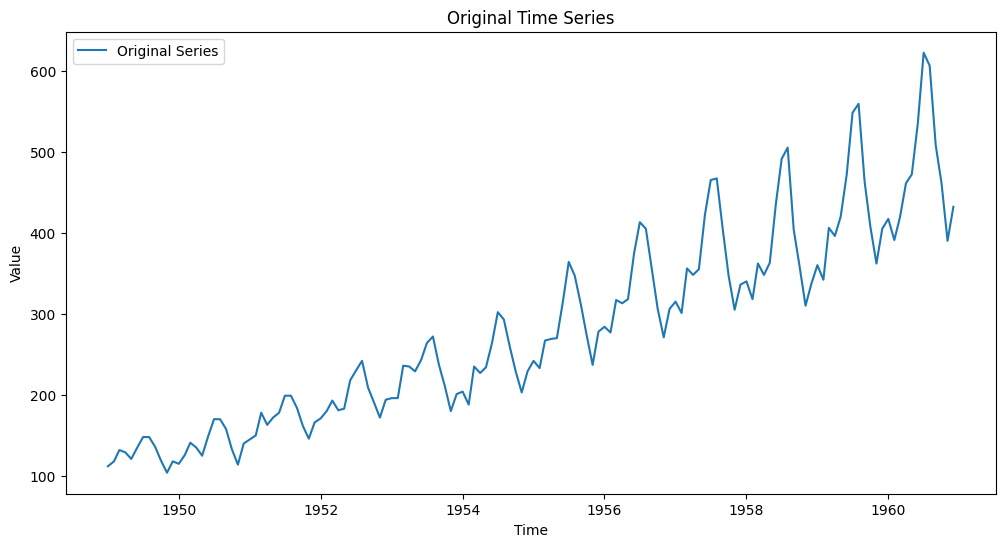

In [4]:
#Plot original series
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Original Series')
plt.title('Original Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

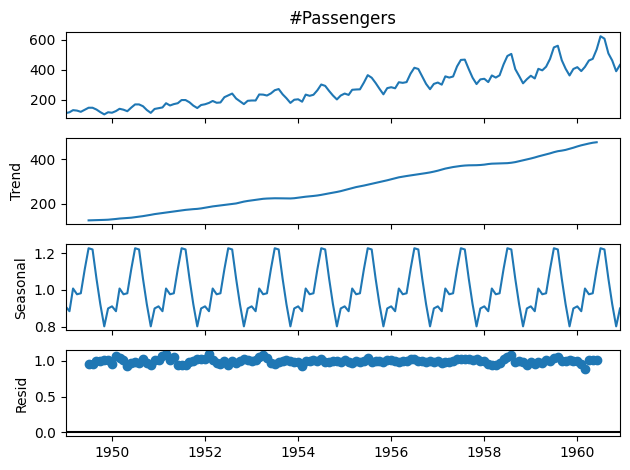

In [5]:
#decompose the series
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts, model='multiplicative', period=12)
decomposition.plot()
plt.show()

7. Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot.


In [7]:
#load dataset
data = pd.read_csv('NYC_taxi_fare_data.csv')

In [8]:
#numerical features for anamoly detection
x = data[['fare_amount', 'trip_distance']]

In [9]:
#apply isolation forest
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.02, random_state=42)
data['anomaly'] = iso.fit_predict(x)

In [10]:
# -1 means anomaly, 1 means normal
anomalies = data[data['anomaly'] == -1]
normal = data[data['anomaly'] == 1]

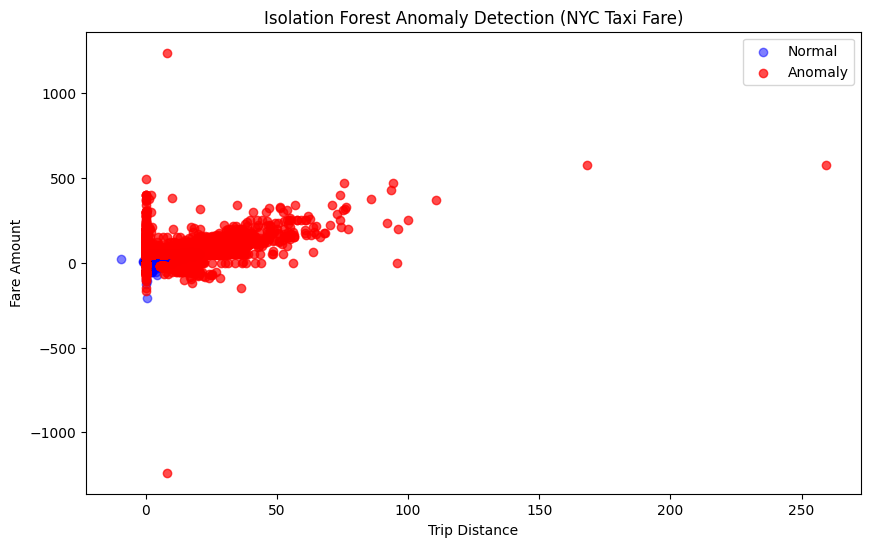

In [11]:
# Visualization
plt.figure(figsize=(10,6))

plt.scatter(normal['trip_distance'], normal['fare_amount'],
            c='blue', label='Normal', alpha=0.5)
plt.scatter(anomalies['trip_distance'], anomalies['fare_amount'],
            c='red', label='Anomaly', alpha=0.7)

plt.title("Isolation Forest Anomaly Detection (NYC Taxi Fare)")
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.legend()
plt.show()

8. Train a SARIMA model on the monthly airline passengers dataset. Forecast the next 12 months and visualize the results.


In [13]:
#load dataset
data = pd.read_csv('AirPassengers.csv')

In [14]:
#Convert to Date Time
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
ts = data['#Passengers']

In [16]:
# Define SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(ts,
                order=(1,1,1),
                seasonal_order=(1,1,1,12),
                enforce_stationarity=False,
                enforce_invertibility=False)

# Fit the model
results = model.fit(disp=False)
print(results.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                        #Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -456.103
Date:                            Tue, 16 Sep 2025   AIC                            922.205
Time:                                    12:05:16   BIC                            936.016
Sample:                                01-01-1949   HQIC                           927.812
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2298      0.401     -0.573      0.567      -1.016       0.557
ma.L1         -0.0987      0.374   

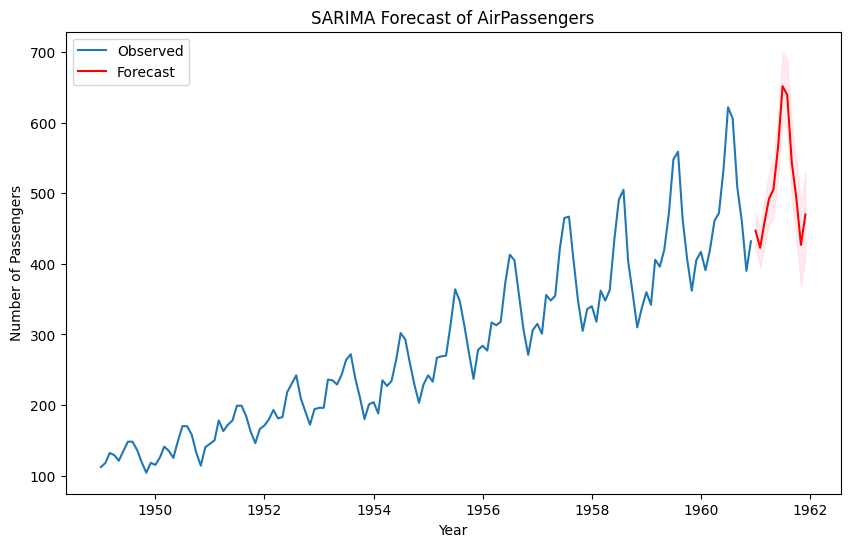

In [17]:
# Forecast for next 12 months
forecast = results.get_forecast(steps=12)

# Confidence intervals
conf_int = forecast.conf_int()

# Plot actual + forecast
plt.figure(figsize=(10,6))
plt.plot(ts, label="Observed")
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean,
         label="Forecast", color='red')
plt.fill_between(conf_int.index,
                 conf_int.iloc[:,0],
                 conf_int.iloc[:,1],
                 color='pink', alpha=0.3)
plt.title("SARIMA Forecast of AirPassengers")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

9. Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib.


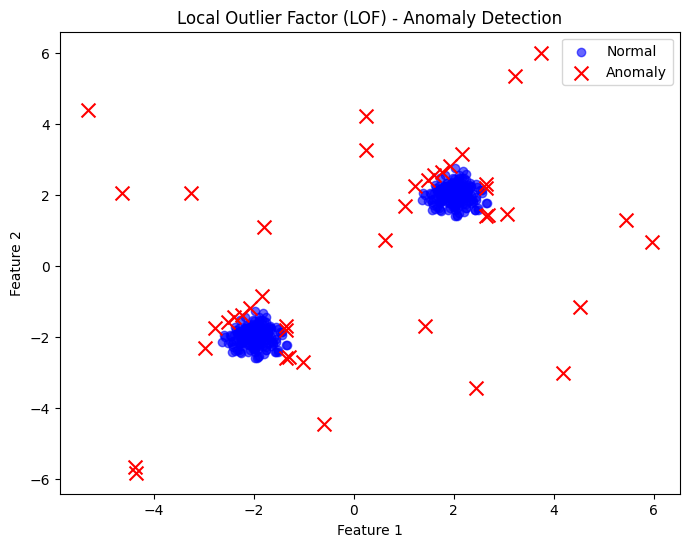

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Generate synthetic 2D data
np.random.seed(42)
X_inliers = 0.3 * np.random.randn(200, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]  # two clusters

# Add some outliers
X_outliers = np.random.uniform(low=-6, high=6, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

# Apply Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = lof.fit_predict(X)   # -1 = anomaly, 1 = normal

# Separate normal points and anomalies
X_normal = X[y_pred == 1]
X_anomaly = X[y_pred == -1]

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_normal[:, 0], X_normal[:, 1],
            c='blue', label="Normal", alpha=0.6)
plt.scatter(X_anomaly[:, 0], X_anomaly[:, 1],
            c='red', label="Anomaly", marker='x', s=100)

plt.title("Local Outlier Factor (LOF) - Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

10. You are working as a data scientist for a power grid monitoring company. Your goal is to forecast energy demand and also detect abnormal spikes or drops in real-time consumption data collected every 15 minutes. The dataset includes features
like timestamp, region, weather conditions, and energy usage.
Explain your real-time data science workflow:
- How would you detect anomalies in this streaming data (Isolation Forest / LOF / DBSCAN)?
- Which time series model would you use for short-term forecasting (ARIMA / SARIMA / SARIMAX)?
- How would you validate and monitor the performance over time?
- How would this solution help business decisions or operations?


**Anomaly Detection in Streaming Data** > Energy usage is collected every 15 minutes, so detecting abnormal spikes/drops is critical.
- Isolation Forest
  - Works well for high-dimensional data with both numerical (usage) and categorical (region, weather) features.
  - Suitable for streaming data since it can be retrained incrementally.

- Local Outlier Factor (LOF)
  - Detects local anomalies (e.g., one substation shows unusual demand while others are normal).
  - Better for small regions, but computationally heavy for large-scale streaming.

- DBSCAN (Density-based clustering)
  - Groups normal consumption patterns and marks sparse points as anomalies.
  - Useful for regional clustering but not ideal for high-velocity streaming.

**Short-Term Forecasting Model**
Goal: Forecast next few hours of energy demand.

- ARIMA: Captures autocorrelation but ignores seasonality.

- SARIMA: Adds seasonal patterns (daily/weekly cycles in demand).

- SARIMAX: Extends SARIMA by incorporating exogenous variables (like weather, temperature, holidays).

**Final Workflow Summary**

1. Ingest streaming data (Kafka, Spark Streaming).

2. Preprocess & feature engineering (timestamp → hour/day, weather features, rolling averages).

3. Anomaly detection with Isolation Forest (real-time alerts).

4. Short-term forecasting with SARIMAX (demand planning).

5. Monitoring & retraining with rolling evaluation + drift detection.

6. Business impact: Better reliability, cost optimization, and improved operational decisions.